In [2]:
import tensorflow as tf

In [3]:
ds = tf.data.Dataset.range(6)
list(ds.as_numpy_iterator())

[0, 1, 2, 3, 4, 5]

In [4]:
ds = ds.batch(2)
list(ds.as_numpy_iterator())

[array([0, 1]), array([2, 3]), array([4, 5])]

In [5]:
ds = ds.rebatch(3)
list(ds.as_numpy_iterator())

[array([0, 1, 2]), array([3, 4, 5])]

In [6]:
import numpy as np

In [7]:
ds = tf.data.Dataset.range(5)
list(ds.as_numpy_iterator())

[0, 1, 2, 3, 4]

In [8]:
tf.data.Dataset.range(5).reduce(np.int64(0), lambda x, _: x + 1).numpy()

5

In [9]:
tf.data.Dataset.range(5).reduce(np.int64(0), lambda x, y: x + y).numpy()

10

In [10]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
list(dataset.as_numpy_iterator())

[1, 2, 3]

In [11]:
dataset = tf.data.TextLineDataset(["file1.txt", "file2.txt"])

In [12]:
dataset = tf.data.TFRecordDataset(["file1.tfrecords", "file2.tfrecords"])

In [13]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 100, 8, 2, 1])
list(dataset.as_numpy_iterator())

[8, 3, 100, 8, 2, 1]

In [14]:
print(dataset.reduce(5, lambda state, value: state + value).numpy())

127


In [15]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
list(dataset1.as_numpy_iterator())

[array([0.16636157, 0.94102085, 0.9128388 , 0.69029605, 0.39765728,
        0.78604496, 0.3315401 , 0.47816682, 0.30223203, 0.2786516 ],
       dtype=float32),
 array([0.63973   , 0.7575141 , 0.96915114, 0.07083833, 0.95599484,
        0.7675247 , 0.14944232, 0.16763806, 0.12135565, 0.3446753 ],
       dtype=float32),
 array([0.4705913 , 0.26048923, 0.16348362, 0.39243662, 0.8732861 ,
        0.8772397 , 0.40068722, 0.08043885, 0.41173744, 0.40425837],
       dtype=float32),
 array([0.444767  , 0.02330661, 0.34008622, 0.46687043, 0.9462367 ,
        0.9490726 , 0.4630257 , 0.61599195, 0.8983214 , 0.57939327],
       dtype=float32)]

In [16]:
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [17]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))
list(dataset2.as_numpy_iterator())

[(0.37151086,
  array([94, 45, 21, 54, 61, 32, 75, 52, 10, 33, 82, 33, 77, 10, 95,  4, 88,
         30, 80, 51, 62, 25, 65, 21, 80, 47, 42, 98, 90, 78, 32, 30, 30, 68,
         85, 19, 80, 22,  6, 15, 79, 52, 51, 73, 28, 97, 71, 83,  3, 28, 19,
         97, 81, 18, 36, 74, 31, 51,  6, 32, 23, 32, 90, 98, 22, 23, 74, 17,
         26, 25, 14, 14, 99, 41, 87, 84, 80, 38, 41, 95,  3, 90, 68, 74, 22,
         90, 73, 13, 24, 96, 19, 96, 44, 48, 85, 65, 54,  3,  4, 35],
        dtype=int32)),
 (0.91716206,
  array([70, 64, 80, 77, 39,  3, 86, 96, 56, 88, 60, 79, 65, 24, 47, 40, 79,
         60, 13, 48, 14, 99, 71, 80, 87, 29, 97, 33, 23, 72, 90, 16,  8, 71,
          9, 20, 41, 70, 13, 34, 69, 95, 59, 44, 59, 21, 94, 29, 45,  8, 44,
         60, 30, 86, 25, 47, 99, 10, 55,  5, 43, 96, 17, 28, 30, 40, 40, 60,
         66, 86, 65, 10, 34, 46, 50, 35, 68, 28, 51,  9, 93, 82, 13, 69,  4,
         64, 93, 33, 21, 13, 66, 50, 27, 81, 54, 39,  3, 29, 87, 92],
        dtype=int32)),
 (0.84261656,
  

In [18]:
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [19]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
list(dataset3.as_numpy_iterator())

[(array([0.16636157, 0.94102085, 0.9128388 , 0.69029605, 0.39765728,
         0.78604496, 0.3315401 , 0.47816682, 0.30223203, 0.2786516 ],
        dtype=float32),
  (0.37151086,
   array([94, 45, 21, 54, 61, 32, 75, 52, 10, 33, 82, 33, 77, 10, 95,  4, 88,
          30, 80, 51, 62, 25, 65, 21, 80, 47, 42, 98, 90, 78, 32, 30, 30, 68,
          85, 19, 80, 22,  6, 15, 79, 52, 51, 73, 28, 97, 71, 83,  3, 28, 19,
          97, 81, 18, 36, 74, 31, 51,  6, 32, 23, 32, 90, 98, 22, 23, 74, 17,
          26, 25, 14, 14, 99, 41, 87, 84, 80, 38, 41, 95,  3, 90, 68, 74, 22,
          90, 73, 13, 24, 96, 19, 96, 44, 48, 85, 65, 54,  3,  4, 35],
         dtype=int32))),
 (array([0.63973   , 0.7575141 , 0.96915114, 0.07083833, 0.95599484,
         0.7675247 , 0.14944232, 0.16763806, 0.12135565, 0.3446753 ],
        dtype=float32),
  (0.91716206,
   array([70, 64, 80, 77, 39,  3, 86, 96, 56, 88, 60, 79, 65, 24, 47, 40, 79,
          60, 13, 48, 14, 99, 71, 80, 87, 29, 97, 33, 23, 72, 90, 16,  8, 71,
  

In [20]:
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [21]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))
list(dataset4.as_numpy_iterator())

[array([[1, 0, 0, 0],
        [0, 0, 2, 0],
        [0, 0, 0, 0]], dtype=int32)]

In [22]:
dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [23]:
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

In [24]:
dataset1 = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 10], minval=1, maxval=10, dtype=tf.int32))
list(dataset1.as_numpy_iterator())

[array([6, 4, 5, 8, 8, 3, 2, 2, 9, 8], dtype=int32),
 array([1, 9, 1, 1, 5, 9, 9, 4, 2, 9], dtype=int32),
 array([7, 5, 9, 5, 4, 8, 3, 8, 7, 2], dtype=int32),
 array([7, 3, 4, 6, 6, 4, 5, 5, 9, 3], dtype=int32)]

In [25]:
dataset1

<_TensorSliceDataset element_spec=TensorSpec(shape=(10,), dtype=tf.int32, name=None)>

In [26]:
for z in dataset1:
  print(z.numpy())

[6 4 5 8 8 3 2 2 9 8]
[1 9 1 1 5 9 9 4 2 9]
[7 5 9 5 4 8 3 8 7 2]
[7 3 4 6 6 4 5 5 9 3]


In [27]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

list(dataset2.as_numpy_iterator())

[(0.40283966,
  array([18, 46, 24, 69, 15,  3, 86, 10, 61, 21, 15,  0,  7, 67,  3,  9, 29,
         98, 35, 66, 93, 15, 24,  0, 14, 67, 86, 73, 90, 99, 16, 61, 60, 40,
         12, 23, 26, 21, 29, 24, 34, 59, 15, 53, 53, 71, 24, 77, 92, 17, 30,
         82, 88,  7,  0, 18, 41, 41, 71, 86, 27, 37, 26, 94, 53, 22, 61, 50,
         32, 46, 42,  9, 86, 90, 54, 85, 52, 41, 67, 24, 20, 54, 28, 66, 50,
          0, 72, 38, 35, 48,  9, 31, 74, 56, 74, 65, 68, 82, 54, 81],
        dtype=int32)),
 (0.10943985,
  array([50, 62,  9, 71, 70, 56, 38,  9, 34, 55, 48, 73, 81, 22, 89, 83, 55,
         19, 11, 74, 55,  8, 70, 45, 23, 24, 28,  0, 74, 75, 99, 68, 96, 87,
         16, 56, 29, 61, 39, 63, 63, 95, 81, 98,  9, 72, 99, 66, 25, 58, 12,
         50, 76, 81, 17, 93, 29, 19, 52,  4, 96, 41, 25, 33,  1,  6, 34, 71,
         12, 90, 54, 72, 39, 98, 22, 99, 57, 39, 17, 45, 24, 36, 78, 90, 92,
         28, 68, 36, 85, 46, 93, 27, 19, 32,  3, 60, 47, 34, 10, 61],
        dtype=int32)),
 (0.9637648,
  a

In [28]:
dataset2

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))>

In [29]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
list(dataset3.as_numpy_iterator())

[(array([6, 4, 5, 8, 8, 3, 2, 2, 9, 8], dtype=int32),
  (0.40283966,
   array([18, 46, 24, 69, 15,  3, 86, 10, 61, 21, 15,  0,  7, 67,  3,  9, 29,
          98, 35, 66, 93, 15, 24,  0, 14, 67, 86, 73, 90, 99, 16, 61, 60, 40,
          12, 23, 26, 21, 29, 24, 34, 59, 15, 53, 53, 71, 24, 77, 92, 17, 30,
          82, 88,  7,  0, 18, 41, 41, 71, 86, 27, 37, 26, 94, 53, 22, 61, 50,
          32, 46, 42,  9, 86, 90, 54, 85, 52, 41, 67, 24, 20, 54, 28, 66, 50,
           0, 72, 38, 35, 48,  9, 31, 74, 56, 74, 65, 68, 82, 54, 81],
         dtype=int32))),
 (array([1, 9, 1, 1, 5, 9, 9, 4, 2, 9], dtype=int32),
  (0.10943985,
   array([50, 62,  9, 71, 70, 56, 38,  9, 34, 55, 48, 73, 81, 22, 89, 83, 55,
          19, 11, 74, 55,  8, 70, 45, 23, 24, 28,  0, 74, 75, 99, 68, 96, 87,
          16, 56, 29, 61, 39, 63, 63, 95, 81, 98,  9, 72, 99, 66, 25, 58, 12,
          50, 76, 81, 17, 93, 29, 19, 52,  4, 96, 41, 25, 33,  1,  6, 34, 71,
          12, 90, 54, 72, 39, 98, 22, 99, 57, 39, 17, 45, 24, 36

In [30]:
dataset3

<_ZipDataset element_spec=(TensorSpec(shape=(10,), dtype=tf.int32, name=None), (TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None)))>

In [31]:
for a, (b,c) in dataset3:
  print('shapes: {a.shape}, {b.shape}, {c.shape}'.format(a=a, b=b, c=c))

shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)


##Tensorflow basic

In [32]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [33]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)


tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [34]:
print(x.shape)

(2, 3)


In [35]:
print(x.dtype)

<dtype: 'float32'>


In [36]:
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [37]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [38]:
x * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [39]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [40]:
tf.concat([x, x, x], axis=1)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6., 4., 5., 6.]], dtype=float32)>

In [41]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [42]:
tf.nn.softmax(x, axis=1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [43]:
tf.nn.softmax(x, axis=0)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.04742587, 0.04742587, 0.04742587],
       [0.95257413, 0.95257413, 0.95257413]], dtype=float32)>

In [44]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [45]:
tf.math.log(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.       , 0.6931472, 1.0986123],
       [1.3862944, 1.609438 , 1.7917595]], dtype=float32)>

In [46]:
softmax = tf.nn.softmax([-1, 0., 1.])
softmax

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>

In [47]:
softmax = tf.nn.softmax([1, 2., 3.])
softmax

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>

In [48]:
softmax = tf.exp([1, 2., 3.]) / tf.reduce_sum(tf.exp([1, 2., 3.]), axis=0, keepdims=True)
softmax

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>

In [49]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [50]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [51]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [52]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [53]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


In [54]:
var = tf.Variable([0.0, 0.0, 0.0])

In [55]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [56]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [57]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [58]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [59]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [60]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

In [61]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [62]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [63]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [64]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [65]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [66]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

In [67]:
!ls saved

assets	fingerprint.pb	saved_model.pb	variables


In [68]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([5, 6, 7]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 18, 21], dtype=int32)>

In [69]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

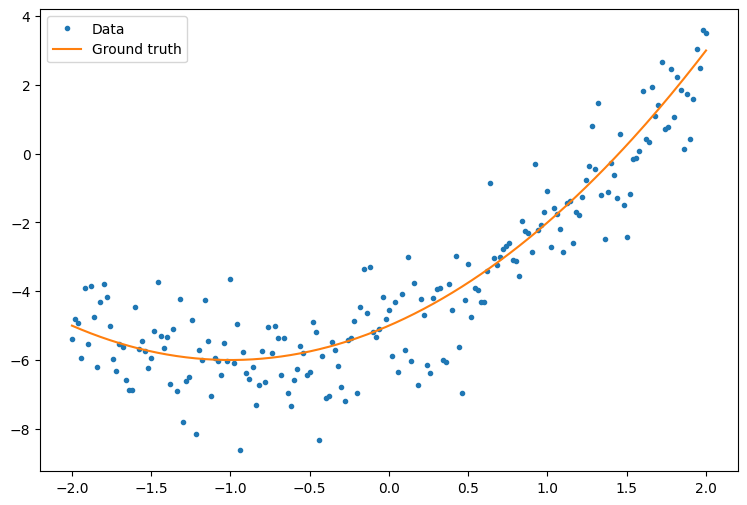

In [70]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)
#print(x)
def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])
#print(y)
plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [71]:
x,y

(<tf.Tensor: shape=(201,), dtype=float32, numpy=
 array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
        -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
        -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
        -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
        -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
        -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
        -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
        -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
        -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
        -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
        -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
        -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
         0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
         0.34,  0.36,  0.38,

In [72]:
f(-2)

-5

In [73]:
import tensorflow as tf

random_numbers = tf.random.normal(shape=[201])
print(random_numbers)

tf.Tensor(
[-0.9580369  -0.6642879   0.16382925 -1.0324256   0.7056085  -1.075417
 -0.03324786 -0.20135604  2.8950634  -2.4058986   0.31520325 -0.38601744
  1.7233757  -0.34273496 -0.8646075  -0.6769706   0.44306806  0.24362552
 -0.6609438   1.9472203  -1.1943549   1.3848618   0.70655644  1.3302243
  0.89604264 -0.60337985 -0.22422841  0.13507217  0.8270985   1.0016723
  0.11184012 -0.78866166  0.3213882  -0.07321797  0.8476      1.1082366
  0.71828914  0.35063687  1.9260993  -0.29987073  0.9557963  -1.4523717
 -1.5172585  -1.8171371  -1.0530818   0.35976538  1.135297   -0.7733002
 -1.3016075  -0.98780346  0.3165288  -1.1511843   1.1116132   0.13387325
  0.30863693 -1.4786162  -1.902448    0.8135857  -0.777286    0.35079673
  0.24037929  0.4634058   0.38462704 -2.0734568   2.0241053  -0.07176195
 -0.19915262  0.12434462 -0.38718784 -0.6894313  -1.1629242  -0.8055351
 -1.1636907   0.1933583   0.98493576 -0.83653766  1.4158974   1.5121839
 -0.29592744 -0.9814856  -1.1172619  -2.1309776  

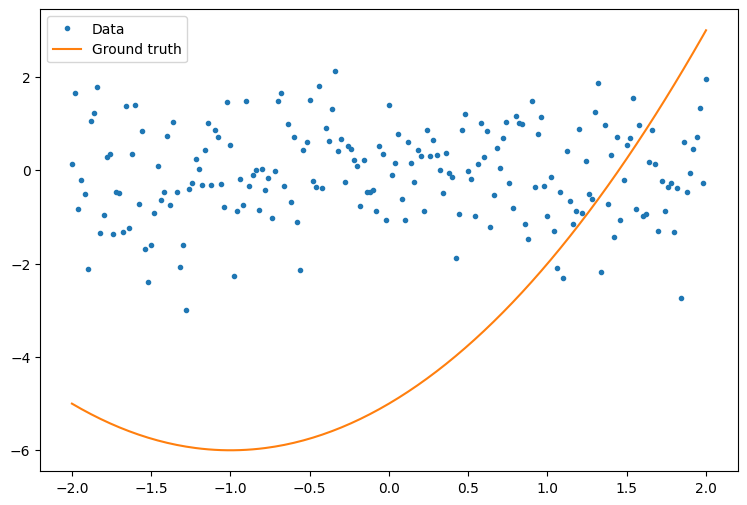

In [74]:
z = tf.random.normal(shape=[201])
#print(y)
plt.plot(x.numpy(), z.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [75]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

In [76]:
rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
rand_init

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.4291573, 4.3870163, 4.6892653], dtype=float32)>

In [77]:
tf.Variable(rand_init[0])

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.4291573>

In [78]:
tf.Variable(rand_init[1])

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.3870163>

In [79]:
tf.Variable(rand_init[2])

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.6892653>

In [80]:
quad_model = Model()

In [81]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

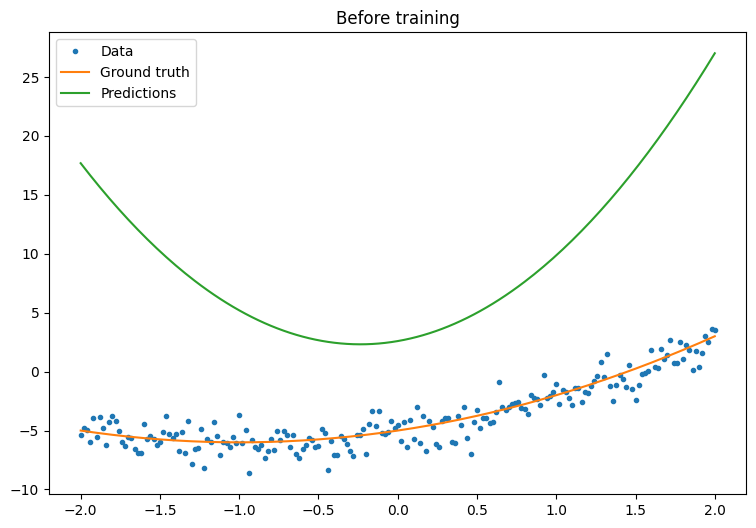

In [82]:
plot_preds(x, y, f, quad_model, 'Before training')

In [83]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [84]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 69.997
Mean squared error for step 10: 4.473
Mean squared error for step 20: 2.188
Mean squared error for step 30: 1.401
Mean squared error for step 40: 1.143
Mean squared error for step 50: 1.048
Mean squared error for step 60: 1.008
Mean squared error for step 70: 0.996
Mean squared error for step 80: 0.991
Mean squared error for step 90: 0.990




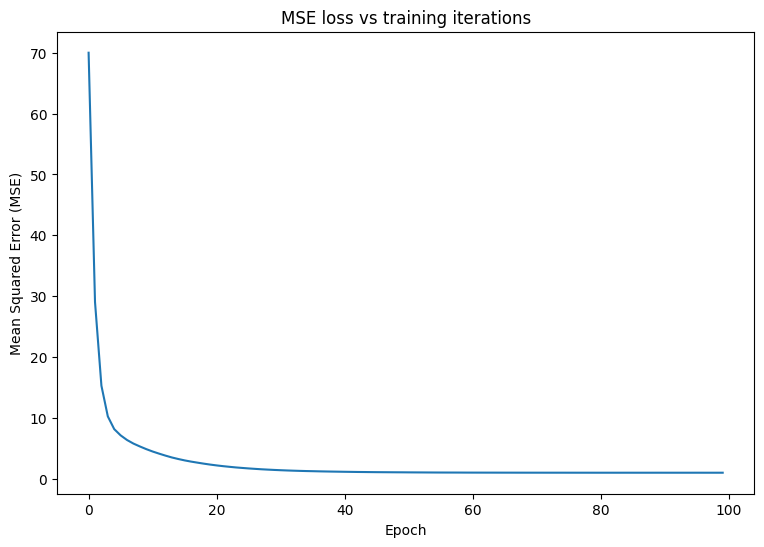

In [85]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

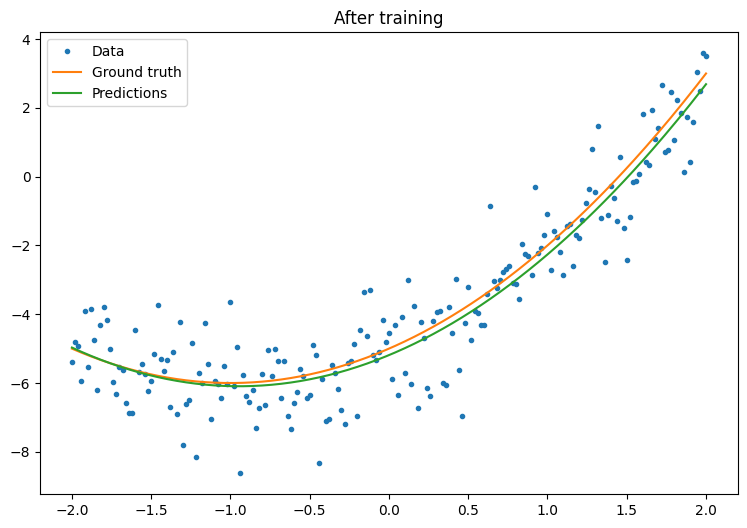

In [86]:
plot_preds(x, y, f, quad_model, 'After training')

In [87]:
quad_model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-5.1885886>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.914315>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0121404>)

In [88]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [89]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(


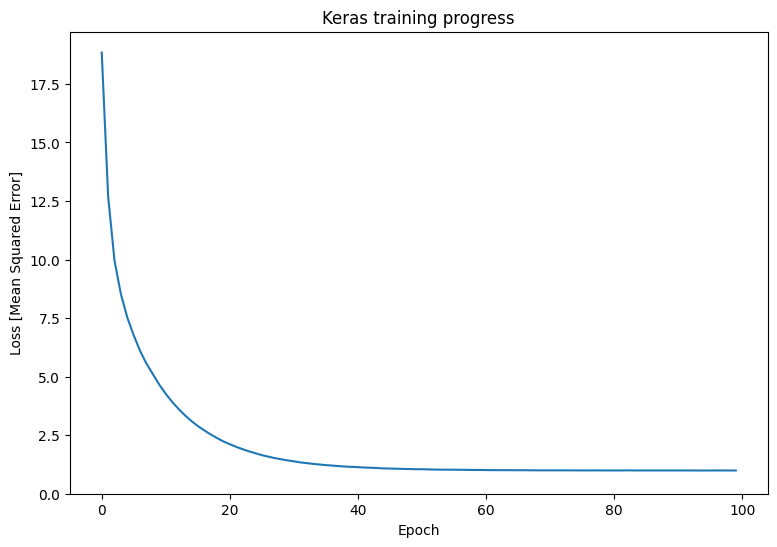

In [90]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

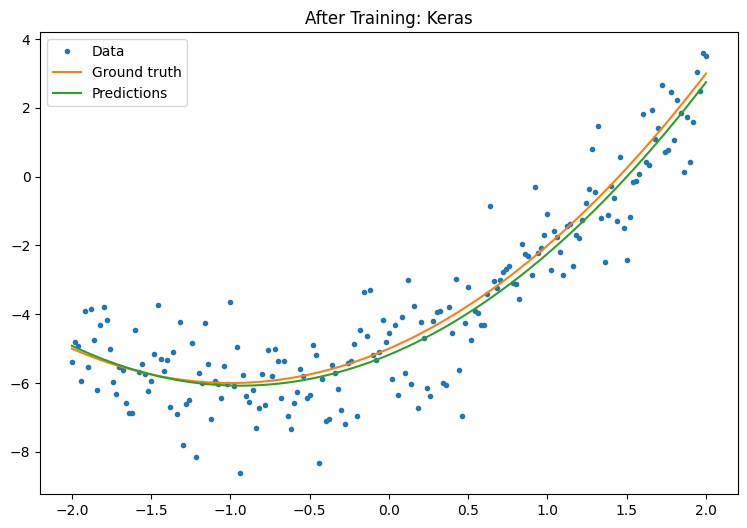

In [91]:
plot_preds(x, y, f, new_model, 'After Training: Keras')

#Tensor

In [92]:
import tensorflow as tf
import numpy as np

In [93]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)


tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [94]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


In [95]:
from numpy import array, argmin, sqrt, sum
observation = array([111.0, 188.0])
codes = array([[102.0, 203.0],
               [132.0, 193.0],
               [45.0, 155.0],
               [57.0, 173.0]])


In [96]:
diff = codes - observation    # the broadcast happens here
diff

array([[ -9.,  15.],
       [ 21.,   5.],
       [-66., -33.],
       [-54., -15.]])

In [97]:
diff**2

array([[  81.,  225.],
       [ 441.,   25.],
       [4356., 1089.],
       [2916.,  225.]])

In [98]:
sum(diff**2, axis=-1)

array([ 306.,  466., 5445., 3141.])

In [99]:
sum(diff**2, axis=1)

array([ 306.,  466., 5445., 3141.])

In [100]:
dist = sqrt(sum(diff**2,axis=-1))
argmin(dist)

0

In [101]:
import numpy as np
x = np.arange(15).reshape((5,  1, 3))
x

array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]],

       [[12, 13, 14]]])

In [102]:
y = np.arange(30).reshape((10, 3))
y

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [103]:
y.shape

(10, 3)

In [104]:
diff = x - y
diff

array([[[  0,   0,   0],
        [ -3,  -3,  -3],
        [ -6,  -6,  -6],
        [ -9,  -9,  -9],
        [-12, -12, -12],
        [-15, -15, -15],
        [-18, -18, -18],
        [-21, -21, -21],
        [-24, -24, -24],
        [-27, -27, -27]],

       [[  3,   3,   3],
        [  0,   0,   0],
        [ -3,  -3,  -3],
        [ -6,  -6,  -6],
        [ -9,  -9,  -9],
        [-12, -12, -12],
        [-15, -15, -15],
        [-18, -18, -18],
        [-21, -21, -21],
        [-24, -24, -24]],

       [[  6,   6,   6],
        [  3,   3,   3],
        [  0,   0,   0],
        [ -3,  -3,  -3],
        [ -6,  -6,  -6],
        [ -9,  -9,  -9],
        [-12, -12, -12],
        [-15, -15, -15],
        [-18, -18, -18],
        [-21, -21, -21]],

       [[  9,   9,   9],
        [  6,   6,   6],
        [  3,   3,   3],
        [  0,   0,   0],
        [ -3,  -3,  -3],
        [ -6,  -6,  -6],
        [ -9,  -9,  -9],
        [-12, -12, -12],
        [-15, -15, -15],
        [-18, -18, 

In [105]:
diff1 = y - x
diff1

array([[[  0,   0,   0],
        [  3,   3,   3],
        [  6,   6,   6],
        [  9,   9,   9],
        [ 12,  12,  12],
        [ 15,  15,  15],
        [ 18,  18,  18],
        [ 21,  21,  21],
        [ 24,  24,  24],
        [ 27,  27,  27]],

       [[ -3,  -3,  -3],
        [  0,   0,   0],
        [  3,   3,   3],
        [  6,   6,   6],
        [  9,   9,   9],
        [ 12,  12,  12],
        [ 15,  15,  15],
        [ 18,  18,  18],
        [ 21,  21,  21],
        [ 24,  24,  24]],

       [[ -6,  -6,  -6],
        [ -3,  -3,  -3],
        [  0,   0,   0],
        [  3,   3,   3],
        [  6,   6,   6],
        [  9,   9,   9],
        [ 12,  12,  12],
        [ 15,  15,  15],
        [ 18,  18,  18],
        [ 21,  21,  21]],

       [[ -9,  -9,  -9],
        [ -6,  -6,  -6],
        [ -3,  -3,  -3],
        [  0,   0,   0],
        [  3,   3,   3],
        [  6,   6,   6],
        [  9,   9,   9],
        [ 12,  12,  12],
        [ 15,  15,  15],
        [ 18,  18, 

https://dev.mrdbourke.com/tensorflow-deep-learning/00_tensorflow_fundamentals/

By default, TensorFlow creates tensors with either an int32 or float32 datatype.

This is known as 32-bit precision (the higher the number, the more precise the number, the more space it takes up on your computer).

In [106]:
import tensorflow as tf

# Generate a rank-4 tensor with random values
rank_4_tensor = tf.random.normal(shape=[2, 4, 4, 3])

print(rank_4_tensor)

tf.Tensor(
[[[[-0.70620954  1.56649    -0.6650646 ]
   [ 0.1708587   0.8689792  -0.5277356 ]
   [ 1.5025182   1.133052    0.64027387]
   [-0.54627466 -0.0381022  -0.15077269]]

  [[ 2.9107897  -1.0005876   0.56183386]
   [-1.1141016   0.78842396  0.96835506]
   [-0.11405461  0.220551    1.5531244 ]
   [ 0.00574321 -0.15146437 -0.9345639 ]]

  [[ 0.96601075 -0.3825297  -1.0570995 ]
   [ 0.32294554  0.2571198  -0.7990347 ]
   [ 0.7377533  -1.1315665   0.97647846]
   [-0.8378626  -0.953613    0.7817953 ]]

  [[-0.3506378   0.3161502   0.83561915]
   [ 0.87953645  1.0635506   0.1618195 ]
   [-0.690858    0.1935398   1.5643482 ]
   [-0.76697195 -0.04523703  0.2355012 ]]]


 [[[ 1.6612524   0.2793991  -0.77363455]
   [ 0.7193047   1.6488849  -1.7262537 ]
   [ 1.303387    0.81868535 -0.69588524]
   [ 0.4937033  -1.0900221   0.4552053 ]]

  [[ 0.4073682  -0.37542912 -0.04951607]
   [-0.58821934  0.836631   -1.2319478 ]
   [ 0.03486733 -0.25720373  0.04818069]
   [-0.85456747  0.47906333 -0.707

In [107]:
import torch
some_tensor = torch.rand(2, 4, 4, 3)
some_tensor

tensor([[[[0.6858, 0.0818, 0.9277],
          [0.3697, 0.4269, 0.1621],
          [0.6390, 0.0387, 0.5926],
          [0.9657, 0.7114, 0.4533]],

         [[0.2217, 0.2929, 0.0141],
          [0.7923, 0.4029, 0.4902],
          [0.6648, 0.5534, 0.7859],
          [0.4558, 0.3806, 0.3764]],

         [[0.3654, 0.0574, 0.5053],
          [0.7272, 0.0234, 0.9055],
          [0.9486, 0.2245, 0.3813],
          [0.2591, 0.4337, 0.9117]],

         [[0.3147, 0.0855, 0.9070],
          [0.1158, 0.5105, 0.5458],
          [0.4618, 0.9510, 0.1276],
          [0.2269, 0.6391, 0.6301]]],


        [[[0.7461, 0.1618, 0.5159],
          [0.3897, 0.7361, 0.7501],
          [0.7879, 0.8983, 0.6485],
          [0.5039, 0.8487, 0.5800]],

         [[0.9382, 0.8120, 0.8542],
          [0.5365, 0.0092, 0.2499],
          [0.0264, 0.6561, 0.2558],
          [0.4119, 0.4225, 0.7307]],

         [[0.3817, 0.3218, 0.9055],
          [0.4159, 0.2844, 0.3422],
          [0.4211, 0.0591, 0.4674],
          [0.8

In [113]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [138]:
# Shuffle in the same order every time using the seed parameter (won't acutally be the same)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [146]:
# Shuffle in the same order every time

# Set the global random seed
tf.random.set_seed(42)

# Set the operation random seed
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [148]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [149]:
# Get the last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [150]:
# Add an extra dimension (to the end)
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # in Python "..." means "all dimensions prior to"

In [151]:
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [152]:
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means last axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [153]:
# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [154]:
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [155]:
tf.transpose(Y)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  9, 11],
       [ 8, 10, 12]], dtype=int32)>

In [156]:
X @ tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [157]:
X @ tf.transpose(Y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [159]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [160]:
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=int64, numpy=
array([[[[[80,  1, 98,  2, 16, 33, 34, 41, 97, 94, 94, 97, 83, 34, 82,
           45, 41, 31, 97, 58, 88, 15, 28, 95, 53, 70, 46, 80, 92, 38,
           17,  3, 17, 74, 29, 64, 92, 87, 72, 25, 57, 18, 81, 43, 69,
           26, 83,  9, 17,  6]]]]])>

In [161]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)

In [162]:
G_squeezed

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([80,  1, 98,  2, 16, 33, 34, 41, 97, 94, 94, 97, 83, 34, 82, 45, 41,
       31, 97, 58, 88, 15, 28, 95, 53, 70, 46, 80, 92, 38, 17,  3, 17, 74,
       29, 64, 92, 87, 72, 25, 57, 18, 81, 43, 69, 26, 83,  9, 17,  6])>